     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
----------------------------------------------------------------------------------------------------
(244, 7)
----------------------------------------------------------------------------------------------------
['Female' 'Male']
---------------------------------------------------------------

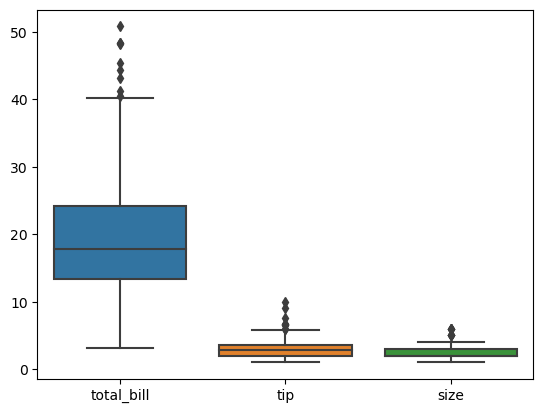

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Step-1 : Business Problem Understanding

# This project is about the insurance expenses depending on the many factors(input variables) as age of the person, 
# gender, body mass index(bmi), the person have how many childrens, is he smoker or not, and his region of residence.

# We have to identify that for how much insurence expenses will be there depending on the independent variables , means we have to identify the relation between expenses and input variables.


# Step-2 : Data Understanding

# We have to uderstand that how many input variables are there which is the output variable and how many continous, discrete categorical, 
# discrete numerical variables are there in dataset, we have to seperate them.
# Is there any wrong data is there in columns?
# How many unique values are there in each column?
# and so on...
 
df = pd.read_csv("D:\\Data Science by SRK\\RestaurantData.csv")
print(df)
print("-"*100)

print(df.shape)
print("-"*100)

print(df["sex"].unique())
print("-"*100)
print(df["smoker"].unique())
print("-"*100)
print(df["day"].unique())
print("-"*100)
print(df["time"].unique())
print("-"*100)

print(df.info())
print("-"*100)

#Exploratory Data Analysis:
# we have continous, discrete categorical, discrete numerical variables are there in dataset, we have to seperate them.

continous_vars = ["total_bill","tip"]
discrete_categoricals = ["sex","smoker","day","time"]
discrete_count = ["size"]

print(df.describe())
print("-"*100)

print(df[continous_vars].describe())
print("-"*100)

print(df[discrete_categoricals].describe())
print("-"*100)

print(df[discrete_count].describe())
print("-"*100)

print(df[continous_vars].corr())
print("-"*100)

sns.boxplot(df)
plt.show()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
----------------------------------------------------------------------------------------------------
1
----------------------------------------------------------------------------------------------------
None (243, 7)
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female 

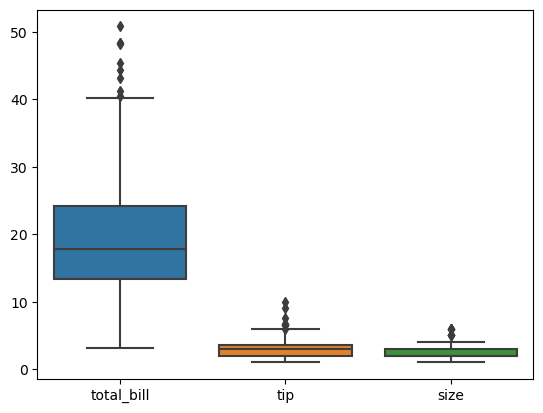

     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    3     1     2
1         10.34  1.66    1       0    3     1     3
2         21.01  3.50    1       0    3     1     3
3         23.68  3.31    1       0    3     1     2
4         24.59  3.61    0       0    3     1     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    1       0    2     1     3
240       27.18  2.00    0       1    2     1     2
241       22.67  2.00    1       1    2     1     2
242       17.82  1.75    1       0    2     1     2
243       18.78  3.00    0       0    4     1     2

[243 rows x 7 columns]


In [7]:
# Step-3 : Data Preprocessing

# Data Cleaning :

print(df.isnull().sum())
print("-"*100)

print(df.duplicated().sum())  # ---> Here, we will get 1 duplicate record, so we should that duplicated record
print("-"*100)

print(df.drop_duplicates(inplace=True),df.shape)  #  ---> It will drop the duplicated record and print new total no. of records in dataset
                                               #  ---> inplace = True , this attribute re-arrange the index of records after dropping records from dataset

# Note: once we drop the duplicated records from the dataset, after that whenever we reload the data if don't use the drop_duplicates() function also, we never get the duplicated records   

# Here we can observe that the 'region' column is not usefull for the model identification, So we should drop the 'region' column

print(df)
print("-"*100)

sns.boxplot(df)
plt.show()


# Data Wrangling : Here, In the dataset we have discrete categorical columns so we have to convert them into discrete count formate,
                       # So, by using the nominal(dummy) encoding we have to convert discrete categorical into discrete count.
    
# Encoding : 

# Encoding sex column
df["sex"].replace({"Female":0,"Male":1},inplace=True)  # ---> It will convert the female into 0 & male into 1 in sex column

# Encoding smoker column
df["smoker"].replace({"No":0,"Yes":1},inplace=True)    # ---> It will convert the no into 0 & yes into 1 in smoker column

# Encoding day column
df["day"].replace({"Fri":1,"Sat":2,"Sun":3,"Thur":4},inplace=True) 

# Encoding sex column
df["time"].replace({"Dinner":1,"Lunch":2},inplace=True)
print(df)

In [8]:
# Step-4 : 1) split the data into two parts as train data and test data

X = df.drop('total_bill' , axis=1)  # or X = df[["age","sex","bmi","children","smoker"]]
print(X)
print("-"*100)
y = df["total_bill"]
print(y)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=9)

      tip  sex  smoker  day  time  size
0    1.01    0       0    3     1     2
1    1.66    1       0    3     1     3
2    3.50    1       0    3     1     3
3    3.31    1       0    3     1     2
4    3.61    0       0    3     1     4
..    ...  ...     ...  ...   ...   ...
239  5.92    1       0    2     1     3
240  2.00    0       1    2     1     2
241  2.00    1       1    2     1     2
242  1.75    1       0    2     1     2
243  3.00    0       0    4     1     2

[243 rows x 6 columns]
----------------------------------------------------------------------------------------------------
0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 243, dtype: float64


In [11]:

# The alpha is very important in model identification. So, we have to first findout the best alpha value for the model.
    
# To find best value of alpha, applying HyperparameterTuning for ElasticNet Regression:

from sklearn.model_selection import GridSearchCV    # GridSearchCV mean within the given list identify best value of cv

from sklearn.linear_model import ElasticNet
estimator = ElasticNet()

# parameters(alphas) & values
param_grid = {"alpha":list(range(1,100)),"l1_ratio":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}   # Here, alpha is key of dictionary(dict) having value as the list of 1 to 99(i.e.[1,2,...,98,99])
    
# Identifying the best value of the paramter(alpha) within the given range of values(i.e. here, 1 to 99) for the given data

model_hp = GridSearchCV(estimator,param_grid,cv=5,scoring='neg_mean_squared_error')  # ---> Here, model_hp will collect the best alpha value
model_hp.fit(X_train,y_train)
model_hp.best_params_      # ---> It will give the best alpha value for best model identification

{'alpha': 1, 'l1_ratio': 1}

In [23]:
# Modelling : 

from sklearn.linear_model import ElasticNet

best_model = ElasticNet(alpha=1,l1_ratio=1)

best_model.fit(X_train,y_train)

print("coefficients:",best_model.coef_)
print("intercept:",best_model.intercept_)

coefficients: [ 2.78269102  0.          0.         -0.         -0.          2.33384877]
intercept: 5.288189192771707


In [24]:
# Step-5 : Prediction

ypred_train = best_model.predict(X_train)
print("ypred_train:",ypred_train)
print("-"*100)

ypred_test = best_model.predict(X_test)
print("ypred_test:",ypred_test)
print("-"*100)



ypred_train: [15.77171098 20.63780859 16.9126143  15.52126879 17.05174885 18.30395981
 18.30395981 18.8048442  25.75434839 18.94397875 20.18896634 15.52126879
 13.99078873 26.23462923 15.52126879 14.12992328 15.52126879 25.75434839
 17.60828706 22.97165736 13.21163524 15.52126879 21.89363124 21.92145815
 19.72313224 31.31973044 19.41703622 21.13508129 14.12992328 15.60474952
 17.49697942 17.19088341 21.08665084 28.53703941 18.30395981 14.51950002
 17.85511756 27.78571284 18.99963257 14.82559603 15.52126879 12.71436254
 15.5490957  10.40472899 23.86934186 18.47092128 23.22209956 28.73182778
 23.30558029 18.30395981 22.0291541  18.30395981 21.27782752 15.52126879
 16.16128773 21.08665084 16.9126143  16.9126143  15.52126879 15.40996115
 24.28674552 23.42049961 15.60474952 15.52126879 24.36300288 13.62903889
 20.18896634 14.63080766 17.85511756 27.1456939  15.52126879 16.93682953
 14.43601929 15.52126879 22.3074232  15.52126879 10.40472899 21.4411773
 18.30395981 12.76640468 19.83443988 19

In [25]:

# Evalution :

from sklearn.metrics import mean_absolute_error
MAE_train = mean_absolute_error(y_train,ypred_train)
print("MAE_train:",MAE_train)
MAE_test = mean_absolute_error(y_test,ypred_test)
print("MAE_test:",MAE_test)
print("-"*100)

from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train,ypred_train)
print("MSE_train:",MSE_train)
MSE_test = mean_squared_error(y_test,ypred_test)
print("MSE_test:",MSE_test)
print("-"*100)

RMSE_train = np.sqrt(MSE_train)
print("RMSE_train:",RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print("RMSE_test:",RMSE_test)
print("-"*100)

r2_train = best_model.score(X_train,y_train)
print("r2_train:",r2_train)
r2_test = best_model.score(X_test,y_test)
print("r2_test:",r2_test)
print("-"*100)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model,X_train,y_train,cv=5)
print(scores)
print("cross_validation_score:",scores.mean())


MAE_train: 4.307771163042352
MAE_test: 4.856776644782006
----------------------------------------------------------------------------------------------------
MSE_train: 37.17435767899766
MSE_test: 38.27703151524153
----------------------------------------------------------------------------------------------------
RMSE_train: 6.097077798338944
RMSE_test: 6.186843420941048
----------------------------------------------------------------------------------------------------
r2_train: 0.4828216060409616
r2_test: 0.6355597195172882
----------------------------------------------------------------------------------------------------
[0.39852123 0.44024743 0.24615284 0.65289863 0.46801824]
cross_validation_score: 0.4411676729923138


In [28]:
# Step-6 : Final Model Selection

# Here we can observe that the L1-Regularization has 100% in ElasticNet Regression, means L2-Regulation has 0%.
# So, L2-Regularization is not usefull here.

# In ElasticNet Regression we can identify the useless column by Lasso Regression using coefficient's value, 
# if the coefficient is equal to zero means the column multiple of that coefficient becomes zero(becomes useless) in model identification

# By observing modelling we can say that the coefficient of 2nd, 3rd, 4th & 5th columns(i.e. sex, smoker, day & time columns resp.) is zero.
# That means the sex column is useless(become zero) for model selection(identification)
# So, we should drop the thse columns to get more model accuray(to get best model)

# Here we are dropping more than 50% of data from the dataset which is the worst think while identifying model,
# So, we can say that ElasticNet Regression is not usefull for this dataset.

print(df.drop(['sex','smoker','day','time'],axis=1))
print("-"*100)

X = df[["tip",'size']]
print(X)
print("-"*100)

y = df["total_bill"]
print(y)
print("-"*100)


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=9)

from sklearn.linear_model import ElasticNet

final_model = ElasticNet(alpha=1,l1_ratio=1)
final_model.fit(X_train,y_train)

print("coefficients:",final_model.coef_)
print("intercept:",final_model.intercept_)

from sklearn.metrics import mean_absolute_error
MAE_train = mean_absolute_error(y_train,ypred_train)
print("MAE_train:",MAE_train)
MAE_test = mean_absolute_error(y_test,ypred_test)
print("MAE_test:",MAE_test)
print("-"*100)

from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train,ypred_train)
print("MSE_train:",MSE_train)
MSE_test = mean_squared_error(y_test,ypred_test)
print("MSE_test:",MSE_test)
print("-"*100)

RMSE_train = np.sqrt(MSE_train)
print("RMSE_train:",RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print("RMSE_test:",RMSE_test)
print("-"*100)

r2_train = final_model.score(X_train,y_train)
print("r2_train:",r2_train)
r2_test = final_model.score(X_test,y_test)
print("r2_test:",r2_test)
print("-"*100)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(final_model,X_train,y_train,cv=5)
print(scores)
print("cross_validation_score:",scores.mean())

     total_bill   tip  size
0         16.99  1.01     2
1         10.34  1.66     3
2         21.01  3.50     3
3         23.68  3.31     2
4         24.59  3.61     4
..          ...   ...   ...
239       29.03  5.92     3
240       27.18  2.00     2
241       22.67  2.00     2
242       17.82  1.75     2
243       18.78  3.00     2

[243 rows x 3 columns]
----------------------------------------------------------------------------------------------------
      tip  size
0    1.01     2
1    1.66     3
2    3.50     3
3    3.31     2
4    3.61     4
..    ...   ...
239  5.92     3
240  2.00     2
241  2.00     2
242  1.75     2
243  3.00     2

[243 rows x 2 columns]
----------------------------------------------------------------------------------------------------
0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 243, dtype: float64
---------------------------------

In [30]:
# Step-7 : Prediction on new data by using identified model

new_data = {'tip':1.50, 'sex':'male', 'smoker':'yes','day':'Sun', 'time':'Dinner', 'size':5}
df_test = pd.DataFrame(new_data, index = [0])
print(df_test)
print("-"*100)

df_test.drop(['sex','smoker','day','time'],axis=1,inplace=True) 

print(df_test)

ypred_new_data = final_model.predict(df_test) 
print("ypred_new_data :",ypred_new_data)

   tip   sex smoker  day    time  size
0  1.5  male    yes  Sun  Dinner     5
----------------------------------------------------------------------------------------------------
   tip  size
0  1.5     5
ypred_new_data : [21.1314696]


In [31]:
# The identified model is as :

# ypred_new_data = 2.78269102*(tip) + 2.33384877*(size) + 5.288189192771707

ypred_new_data = 2.78269102*(1.50) + 2.33384877*(5) + 5.288189192771707

print("ypred_new_data:",ypred_new_data)

ypred_new_data: 21.131469572771707
